Dokumentasinya error. Pake live code: https://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Multi%20Class%20Live%20Code.ipynb

Step: 

1.) Introduction to the Iris Data Set

2.) Introduction to Multi-Class Classification (Logistic Regression)

3.) Data Formatting

4.) Data Visualization Analysis

5.) Multi-Class Classification with Sci Kit Learn

6.) Explanation of K Nearest Neighbors

7.) K Nearest Neighbors with Sci Kit Learn

8.) Conclusion

In [21]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [22]:
from sklearn import linear_model

from sklearn.datasets import load_iris

In [23]:
#load the dataset 
iris = load_iris()

In [24]:
X = iris.data

Y = iris.target

In [25]:
#Melihat karakteristik dari dataset iris
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [26]:
#Column diberi nama sesuai atribut yang ada
iris_data = DataFrame(X, columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

In [27]:
#Kolom diberi nama sesuai class yang ada 
iris_target = DataFrame(Y, columns=['Species'])

Dokumentasi tentang Multi Class Classification: 
https://www.youtube.com/watch?v=ZvaELFv5IpM

In [28]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [29]:
iris_target.tail()

,Species
145,2
146,2
147,2
148,2
149,2


Species masih didefinisikan sebagai 0, 1, atau 2. Harus kita ubah dulu

In [30]:
def flower(num):
    if num == 0:
        return 'Sentosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [31]:
#mengubah value dari kolom species
iris_target['Species'] = iris_target['Species'].apply(flower)

In [32]:
iris_target.tail()

,Species
145,Virginica
146,Virginica
147,Virginica
148,Virginica
149,Virginica


Terlihat value dari species sudah berubah

In [33]:
#gabungkan data dan target
iris = pd.concat([iris_data, iris_target], axis=1)

In [34]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Sentosa
1,4.9,3.0,1.4,0.2,Sentosa
2,4.7,3.2,1.3,0.2,Sentosa
3,4.6,3.1,1.5,0.2,Sentosa
4,5.0,3.6,1.4,0.2,Sentosa


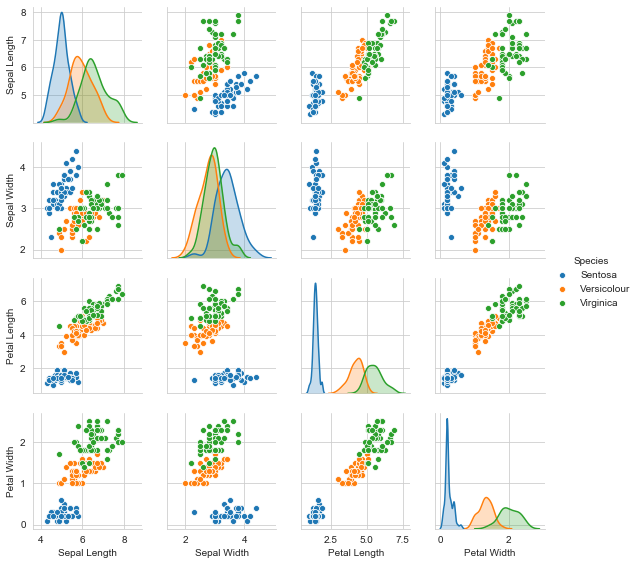

In [35]:
#visualisasi data
#direkomendasikan untuk melihat histogram atau korelasi untuk melihat apakah datanya ada yang aneh 
sns.pairplot(iris, hue='Species', size=2)

Ignoring the diagonal. Sejujurnya saya masih belum tahu apa sih kegunaan dari diagonal di atas? apa membandingkan dua variabel yang sama? Akan tetapi, grafik yang digunakan merupakan kde dan distribusi, apa yang dicek merupakan jumlah?

Kalau melihat grafik dengan ignore diagonal grafik, akan terlihat grafik sudah terbagi tiga areanya berdasarkan dengan spesies (hanya perbandingan sepal width dan sepal length saja Virginica-Versicolour agak sedikit bertabrakan)

Sentosa terlihat sangat jauh berbeda dari dua group di atas. Challenge adalah memisahkan antara Versicolour dan Virginica

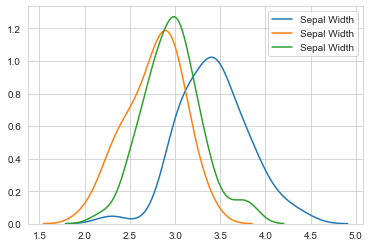

In [36]:
sns.kdeplot(iris[iris['Species'] == 'Sentosa']['Sepal Width'])
sns.kdeplot(iris[iris['Species'] == 'Versicolour']['Sepal Width'])
sns.kdeplot(iris[iris['Species'] == 'Virginica']['Sepal Width'])

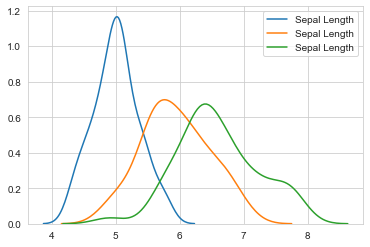

In [37]:
sns.kdeplot(iris[iris['Species'] == 'Sentosa']['Sepal Length'])
sns.kdeplot(iris[iris['Species'] == 'Versicolour']['Sepal Length'])
sns.kdeplot(iris[iris['Species'] == 'Virginica']['Sepal Length'])

Sepertinya memang diagonal merupakan kdeplot atau distribusi dari kolom yang bersangkutan. Nanti saya akan cari tahu lebih lanjut

Melihat distribusi petal length untuk semua species

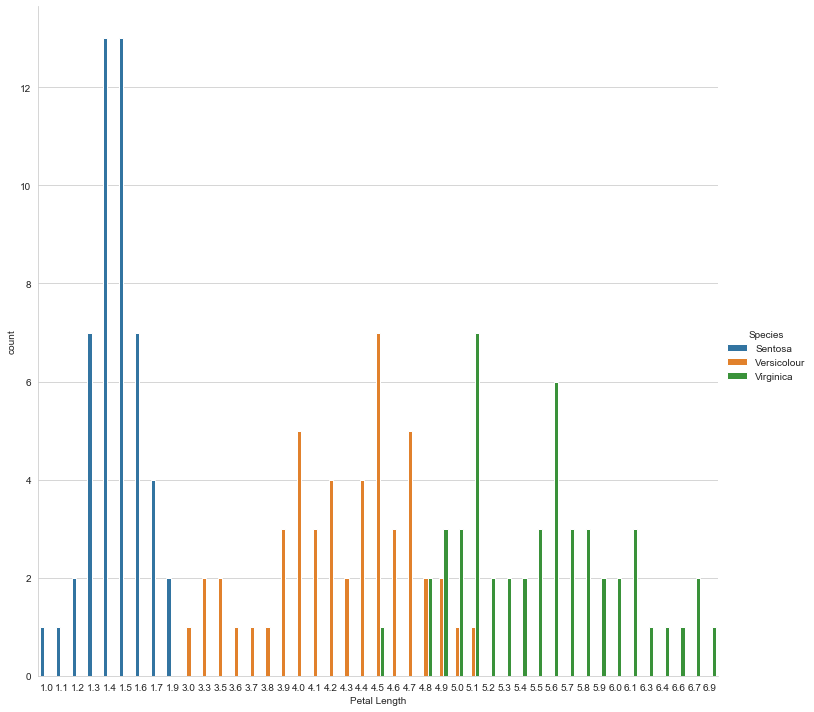

In [38]:
sns.factorplot('Petal Length', data=iris, hue='Species', size=10, kind='count')

Terlihat Setosa berada di petal length paling kecil dan tidak overlap, seperti Versicolour dan Virginica. Meskipun distribusi Virginica lebih tinggi untuk petal length

### Mulitclass Classification dengan Menggunakan Logistic Regerssion

In [39]:
#Melakukan training dan testing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [57]:
logreg = LogisticRegression()

#test_size: berapa banyak data point yang di-test vs di-train, defaultnya di-test 30%, sekarang dibuat 40%
#random_state merupakan seed number yang digunakan untuk melakukan randomized dari dataset X dan Y 
#penjelasan mengenai seed ada di sini: https://www.statisticshowto.com/random-seed-definition/
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=3)

random_state tidak digunakan untuk mengidentifikasikan class, karena class sudah diidentifikasikan di dalam dataset (supervised learning). Logistic Regression kali ini tidak hanya digunakan untuk binary classification, tapi juga multiclass classification

In [58]:
#kalau seednya sama maka akan tetap sama 
from random import random
from random import seed
seed(3)
print(random())

#tapi kenapa butuh seed?

0.23796462709189137


In [59]:
logreg.fit(X_train, Y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
#cek akurasi logistic regression
from sklearn import metrics

In [61]:
Y_pred = logreg.predict(X_test)

In [62]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.9333333333333333


Apakah akurasi 93% benar? Seharusnya benar tinggi, karena kalau kita lihat di models, terlihat separation yang kuat antara ketiga grup. Terurama dalam grup Setosa

### Multiclass Classification dengan Menggunakan k-Nearest Neighbor

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
#k=6
knn = KNeighborsClassifier(n_neighbors = 6)

In [68]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [69]:
Y_pred = knn.predict(X_test)

In [70]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.95


In [71]:
print(Y_pred)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2 1 0 2 2 1 0 0 2 1 1 0 2 0 2 1]


In [72]:
print(X_test)

[[4.6 3.2 1.4 0.2]
 [4.6 3.1 1.5 0.2]
 [5.4 3.4 1.5 0.4]
 [5.  3.  1.6 0.2]
 [5.7 4.4 1.5 0.4]
 [7.7 2.6 6.9 2.3]
 [5.5 2.5 4.  1.3]
 [4.6 3.4 1.4 0.3]
 [6.3 2.9 5.6 1.8]
 [6.7 3.1 4.4 1.4]
 [5.6 3.  4.1 1.3]
 [4.4 3.  1.3 0.2]
 [5.8 2.6 4.  1.2]
 [5.5 2.3 4.  1.3]
 [6.7 3.1 5.6 2.4]
 [5.  3.5 1.3 0.3]
 [6.3 2.5 4.9 1.5]
 [7.7 3.  6.1 2.3]
 [5.7 2.5 5.  2. ]
 [4.4 3.2 1.3 0.2]
 [6.2 2.8 4.8 1.8]
 [6.8 3.  5.5 2.1]
 [6.9 3.1 5.1 2.3]
 [6.8 2.8 4.8 1.4]
 [5.4 3.9 1.7 0.4]
 [7.2 3.6 6.1 2.5]
 [6.1 2.6 5.6 1.4]
 [5.8 2.7 4.1 1. ]
 [4.9 2.4 3.3 1. ]
 [6.7 3.1 4.7 1.5]
 [5.8 4.  1.2 0.2]
 [4.8 3.4 1.9 0.2]
 [6.9 3.1 5.4 2.1]
 [6.6 2.9 4.6 1.3]
 [4.4 2.9 1.4 0.2]
 [5.2 3.5 1.5 0.2]
 [6.7 3.  5.  1.7]
 [4.5 2.3 1.3 0.3]
 [6.4 2.7 5.3 1.9]
 [6.2 2.2 4.5 1.5]
 [6.4 2.8 5.6 2.1]
 [5.8 2.7 3.9 1.2]
 [4.6 3.6 1.  0.2]
 [5.1 3.5 1.4 0.3]
 [6.1 3.  4.9 1.8]
 [6.4 3.2 4.5 1.5]
 [5.1 3.3 1.7 0.5]
 [6.  2.7 5.1 1.6]
 [5.8 2.7 5.1 1.9]
 [5.4 3.  4.5 1.5]
 [4.8 3.  1.4 0.3]
 [5.  3.2 1.2 0.2]
 [5.8 2.7 5.

Self-explanatory untuk predict, seharusnya kita bisa memasukkan dataset lain

In [73]:
#k=1
knn = KNeighborsClassifier(n_neighbors = 1)

In [74]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [75]:
Y_pred = knn.predict(X_test)

In [76]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.9666666666666667


akurasi untuk k=1 lebih tinggi daripada k=6

#### Bagaimana cara mendapatkan nilai k yang paling optimal?
Ada banyak cara. Salah satunya kita bisa cek resource (cek video Udemy). Akan tetapi, untuk dataset sekarang, karena kecil, kita bisa melakukan cycle untuk melihat dataset mana yang paling akurat

In [77]:
k_range = range(1,21)

accuracy = []

In [78]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

Text(0, 0.5, 'Testing accuracy')

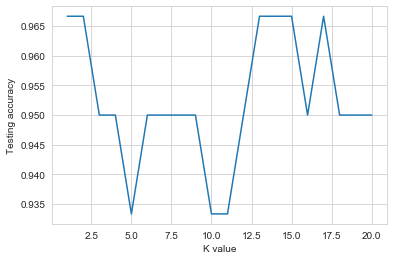

In [79]:
plt.plot(k_range, accuracy)
plt.xlabel('K value')
plt.ylabel('Testing accuracy')

Akurasi naik turun kemudian naik lagi, sesuai dengan k value